# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
# your code here


fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

<AxesSubplot:xlabel='Months_encoded'>

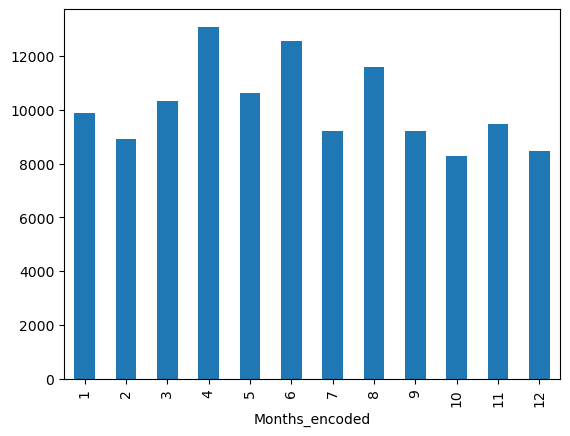

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
fitbit.groupby("Months_encoded")["Steps"].mean().plot.bar()



<AxesSubplot:xlabel='Work_or_Weekend'>

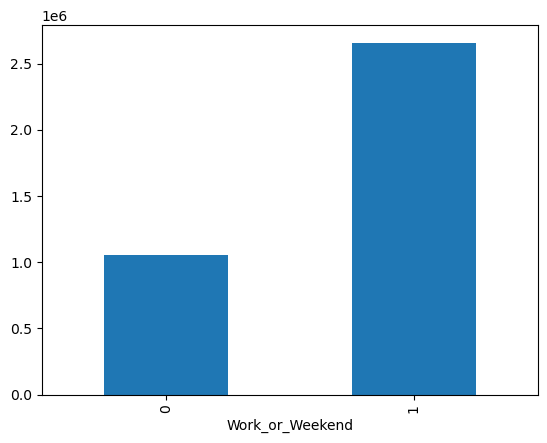

In [4]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
fitbit.groupby("Work_or_Weekend")["Steps"].sum().plot.bar()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

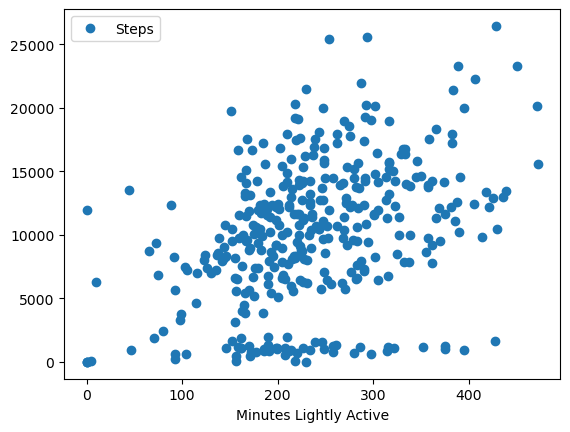

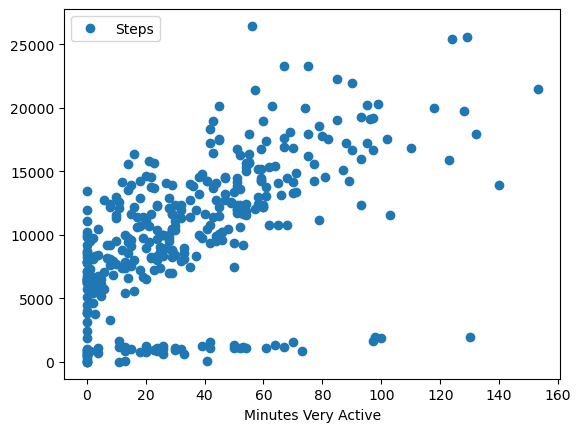

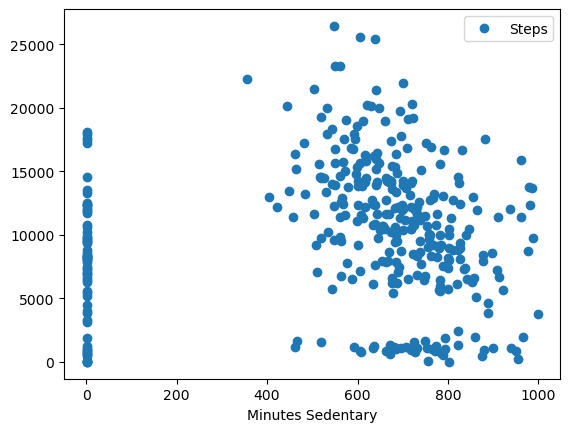

In [5]:
# your code here
subset = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]


for i in subset:
    fitbit.plot(x=i,y="Steps", style="o")

#plt.scatter(x, y, label = "label_name" )

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [6]:

titanic = pd.read_csv("../data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [7]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [8]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=np.number).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [9]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include='object').dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [10]:
# your code here
plt.figure(figsize=(12,6))
plt.style.use("classic")


<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:ylabel='Frequency'>

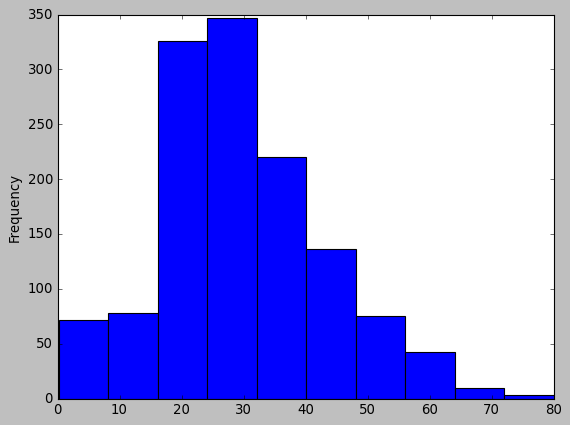

In [11]:
titanic.Age.plot.hist()
#sns.histplot(data=titanic, x="Age")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

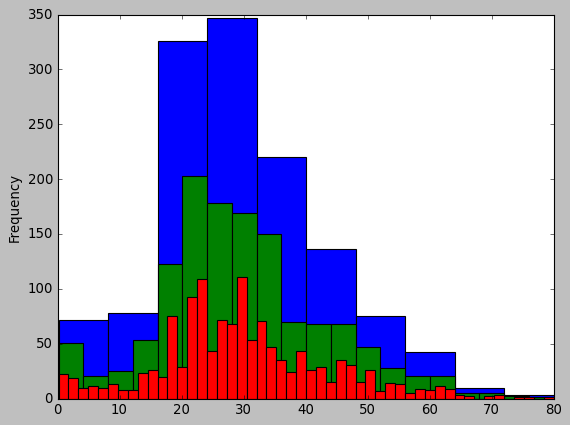

In [12]:
# your code here
titanic.Age.plot.hist(bins = 10)
titanic.Age.plot.hist(bins = 20)
titanic.Age.plot.hist(bins = 50)


#### How does the bin size affect your plot?

In [13]:
"""
the smaller the bin, more precise is the data, but it is harder to visualize.
"""

'\nthe smaller the bin, more precise is the data, but it is harder to visualize.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

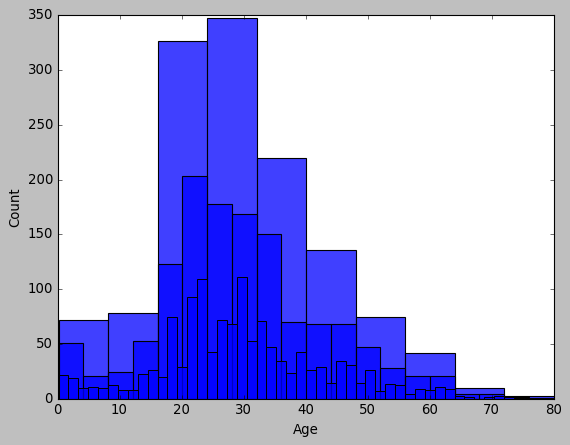

In [14]:
# your code here
sns.histplot(data=titanic, x="Age", bins=10)
sns.histplot(data=titanic, x="Age", bins=20)
sns.histplot(data=titanic, x="Age", bins=50)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

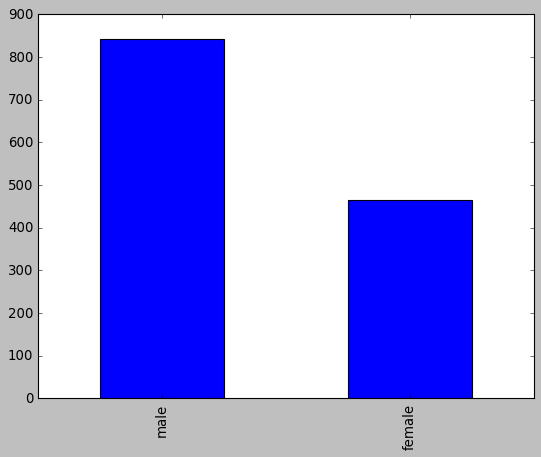

In [15]:
# Method 1 - matplotlib
# your code here
titanic.Gender.value_counts().plot.bar()


<AxesSubplot:xlabel='Gender', ylabel='count'>

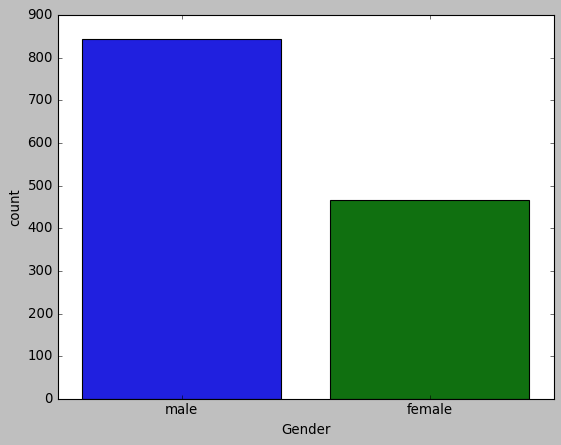

In [16]:
# Method 2 - seaborn
# your code here
sns.countplot (data = titanic, x= "Gender")

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

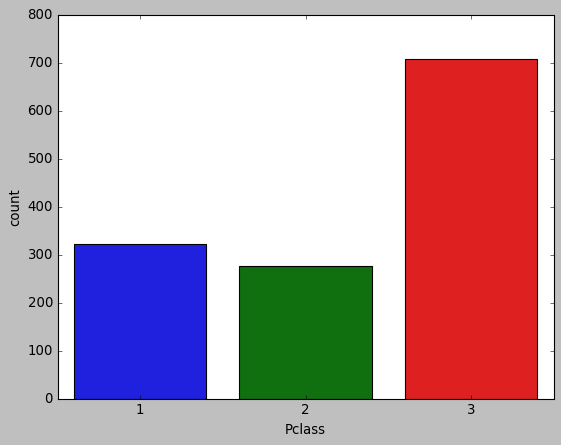

In [17]:
# your code here
sns.countplot (x = titanic["Pclass"])


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

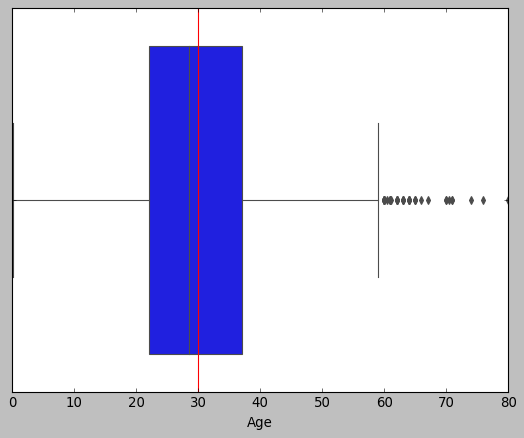

In [18]:
sns.boxplot(x=titanic["Age"])
plt.axvline(x=titanic["Age"].mean(), color="red")

In [19]:
"""
displot or boxplot shows the info better
"""

'\ndisplot or boxplot shows the info better\n'

#### What does the last plot tell you about the feature `Age`?

In [20]:
""" 
most of the distribution is aged between the mean and - std dev, resulting that median is lower than mean.

the mean value sees an increment due to all the outliers seen in the graph - outliers > mean + 3*(std dev)
"""

' \nmost of the distribution is aged between the mean and - std dev, resulting that median is lower than mean.\n\nthe mean value sees an increment due to all the outliers seen in the graph - outliers > mean + 3*(std dev)\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

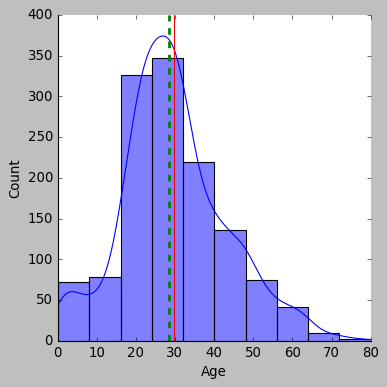

In [21]:
# your code here
sns.displot(titanic["Age"], kde=True, bins=10) 
plt.axvline(x=titanic["Age"].mean(), color="red")
plt.axvline(x=titanic["Age"].median(), color="green", ls = "--",lw=2.5)


#### What additional information does the last plot provide about feature `Age`?

In [22]:
"""
same as before: there are more people aged below the mean, therefore the median<mean -- we can see it visualy
"""

'\nsame as before: there are more people aged below the mean, therefore the median<mean -- we can see it visualy\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

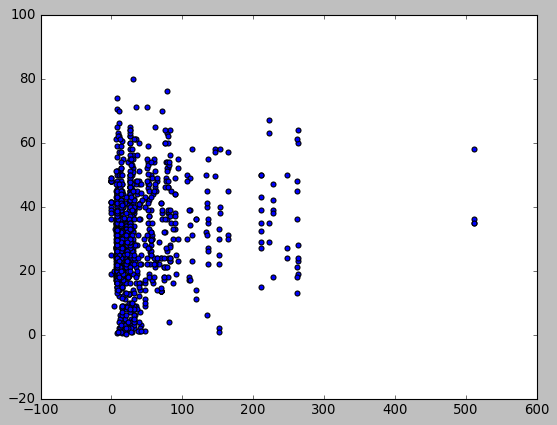

In [23]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic["Fare"], y= titanic["Age"])


<AxesSubplot:xlabel='Fare', ylabel='Age'>

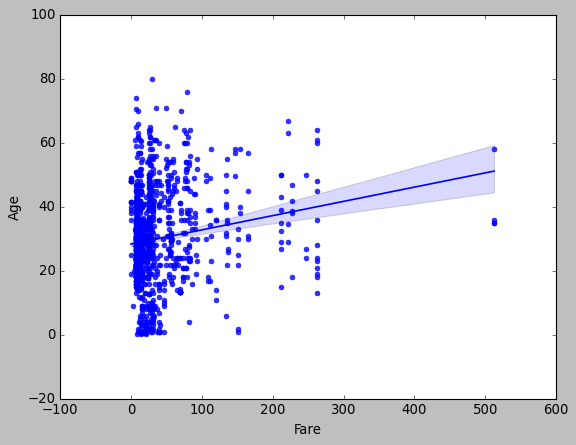

In [24]:
# Method 2 - seaborn
# your code here
sns.regplot(x=titanic["Fare"], y= titanic["Age"])

#### Plot the correlation matrix using seaborn.

In [25]:
# your code here
corr_mat = titanic.corr()
corr_mat
corr_mat.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [26]:
"""
the most correlated features are Fare and Pclass, in a negative correlation

- the more I increase the Pclass (I go from first class to 3rd class) -> the price decreases

"""

'\nthe most correlated features are Fare and Pclass, in a negative correlation\n\n- the more I increase the Pclass (I go from first class to 3rd class) -> the price decreases\n\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

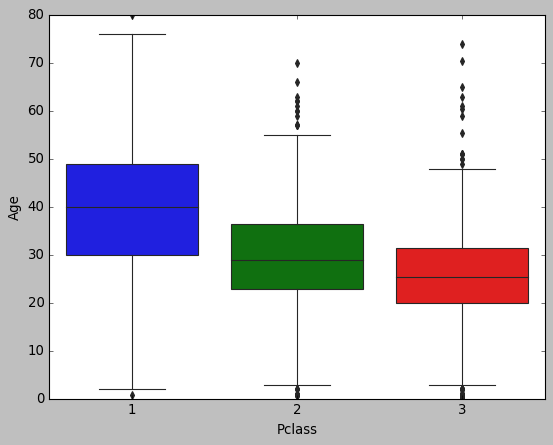

In [29]:
sns.boxplot(x="Pclass", y="Age", data =titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

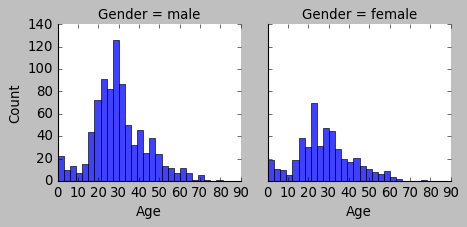

In [28]:
sns.displot(
    titanic, x="Age", col="Gender", binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)